In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# run the benchmark

from benchmark_generation import run_benchmark

df: pd.DataFrame = run_benchmark(
	save_path = "benchmark_temp.jsonl",
	base_configs = None, # this defaults to DEFAULT_GENERATORS
    grid_n_vals = [2, 4, 8, 16, 32],
    n_mazes_vals = [4, 8, 16, 32, 64, 128],
    trials = 10,
    verbose = False,
)

Timing generation: 100%|██████████| 390/390 [1:12:04<00:00, 11.09s/config]   

,cfg_name,grid_n,n_mazes,maze_ctor,maze_ctor_kwargs,trials,time
0,benchmark,8,16,gen_prim,{'max_tree_depth': 0.5},10,0.06035134999547154
1,benchmark,4,4,gen_prim,{'accessible_cells': 0.5},10,0.004579219990409911
2,benchmark,32,16,gen_prim,{'max_tree_depth': 0.5},10,0.8074800900067203
3,benchmark,2,4,gen_prim,{},10,0.003790730005130172
4,benchmark,8,4,gen_dfs,{'accessible_cells': 20},10,0.011156520002987235
5,benchmark,4,8,gen_dfs,{'max_tree_depth': 0.5},10,0.016494119993876667
6,benchmark,16,32,gen_prim,"{'accessible_cells': 0.5, 'max_tree_depth': 0.5}",10,0.21281694999197498
7,benchmark,4,64,gen_prim,{'max_tree_depth': 0.5},10,0.05746776000596583
8,benchmark,32,8,gen_dfs,{'accessible_cells': 20},10,0.012730559997726232
9,benchmark,8,16,gen_prim,{},10,0.04821185000473634
10,benchmark,8,32,gen_dfs,{'accessible_cells': 20},10,0.0467273100046441
11,benchmark,2,8,gen_percolation,{'p': 1.0},10,0.007928209996316582
12,benchmark,4,16,gen_dfs_percolation,{'p': 0.1},10,0.029111889994237573
13,b

In [25]:
# or just load the results
df: pd.DataFrame = pd.read_json("benchmark_medium.jsonl", orient="records", lines=True)

In [26]:
# Convert the `maze_ctor_kwargs` column to string type for easier grouping
df['maze_ctor_kwargs_json'] = df['maze_ctor_kwargs'].apply(lambda x: json.dumps(x, sort_keys=True))

# Group the data by the maze generation method (`maze_ctor`) and `maze_ctor_kwargs`, and calculate the average time to generate a *single* maze in milliseconds (ms)
grouped_df = df.groupby(['maze_ctor', 'maze_ctor_kwargs_json']).apply(lambda x: (x['time'].sum() / x['n_mazes'].sum()) * 1000).reset_index()
grouped_df.columns = ['Maze Generation Method', 'Maze Constructor Arguments', 'Average Time (ms)']

# Apply the formatting function to the 'maze_ctor_kwargs' column
grouped_df['Maze Constructor Arguments'] = grouped_df['Maze Constructor Arguments'].apply(lambda x: ','.join(f"{k}={v}" for k,v in json.loads(x).items()))

# Generate the LaTeX table
print(grouped_df)
latex_table = grouped_df.to_latex(index=False, float_format="%.3f")

print(latex_table)

   Maze Generation Method               Maze Constructor Arguments  \
0                 gen_dfs                      accessible_cells=20   
1                 gen_dfs                           do_forks=False   
2                 gen_dfs                       max_tree_depth=0.5   
3                 gen_dfs                                            
4     gen_dfs_percolation                                    p=0.1   
5     gen_dfs_percolation                                    p=0.4   
6         gen_percolation                                    p=1.0   
7                gen_prim  accessible_cells=0.5,max_tree_depth=0.5   
8                gen_prim                     accessible_cells=0.5   
9                gen_prim                           do_forks=False   
10               gen_prim                       max_tree_depth=0.5   
11               gen_prim                                            
12             gen_wilson                                            

    Average Time (m

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\831155250.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = grouped_df.to_latex(index=False, float_format="%.3f")


C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\1806633641.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_selected, x='grid_n', y='time_normalized', hue='maze_ctor', marker='o', ci=None)


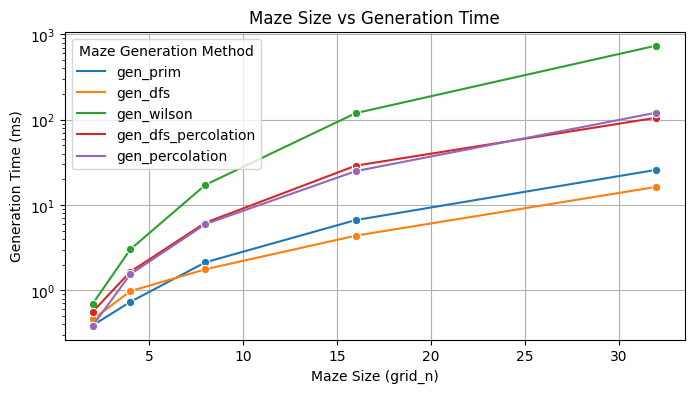

In [27]:
# Convert the 'time' to milliseconds for easier interpretation in the plot
df['time_ms'] = df['time'] * 1000
df['time_normalized'] = df['time_ms'] / df['n_mazes']
# select only rows where n_mazes == 32
df_selected = df[df['n_mazes'] == 32]
# Plot maze size vs generation time for each method
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_selected, x='grid_n', y='time_normalized', hue='maze_ctor', marker='o', ci=None)
plt.title('Maze Size vs Generation Time')
plt.xlabel('Maze Size (grid_n)')
plt.ylabel('Generation Time (ms)')
plt.yscale('log')
plt.legend(title='Maze Generation Method')
plt.grid(True)
plt.show()

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\798505233.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


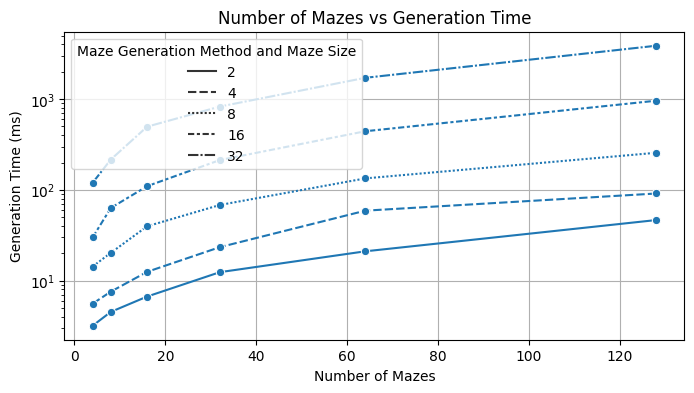

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\798505233.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


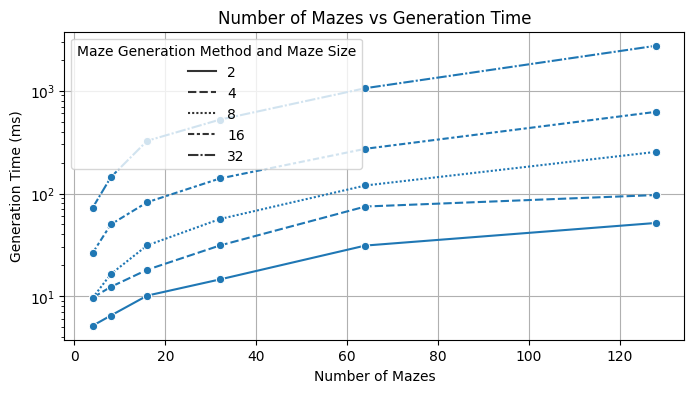

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\798505233.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


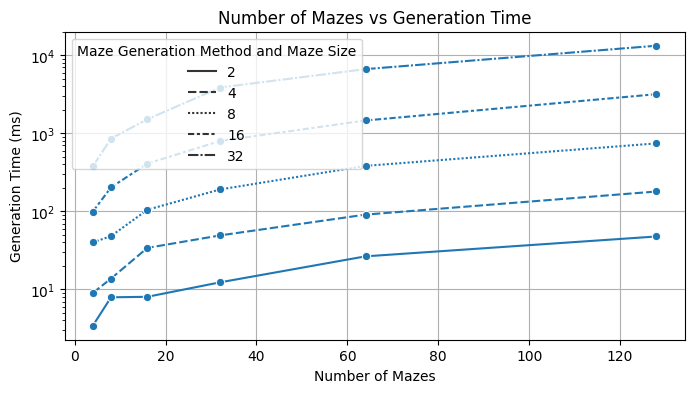

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\798505233.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


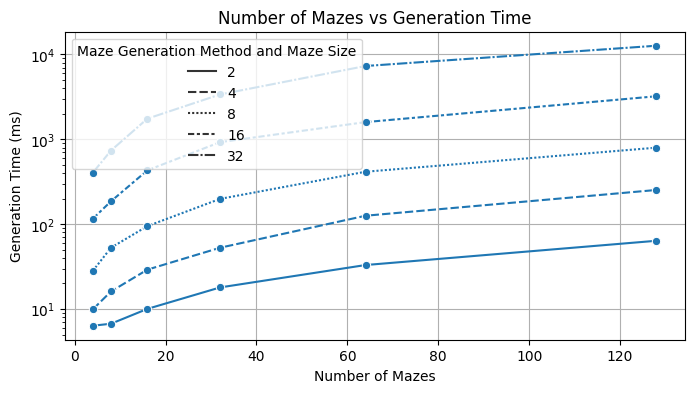

C:\Users\mivan\AppData\Local\Temp\ipykernel_29884\798505233.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


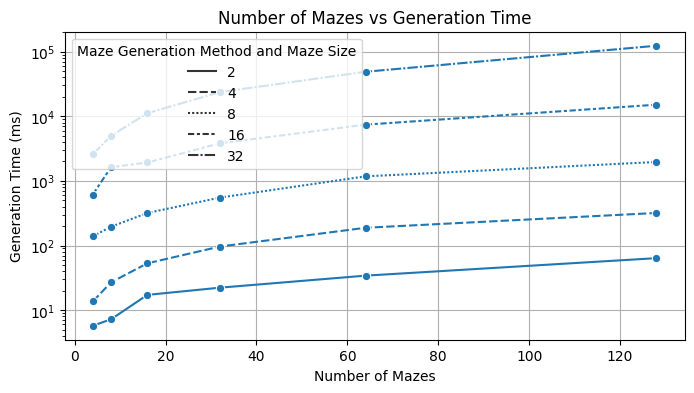

In [14]:
# Plot number of mazes vs generation time for each method and maze size
# for each of the unique maze_ctor

for maze_ctor in df['maze_ctor'].unique():
	plt.figure(figsize=(8, 4))
	sns.lineplot(
		data=df[df['maze_ctor'] == maze_ctor],
		x='n_mazes', 
		y='time_ms', 
		style='grid_n', 
		marker='o', 
		ci=None,
	)
	plt.title('Number of Mazes vs Generation Time')
	plt.xlabel('Number of Mazes')
	plt.ylabel('Generation Time (ms)')
	# plt.xscale('log')
	plt.yscale('log')
	plt.legend(title='Maze Generation Method and Maze Size', loc='upper left')
	plt.grid(True)
	plt.show()

<Axes: title={'center': 'Benchmark'}, xlabel='Number of mazes', ylabel='Time (s)'>

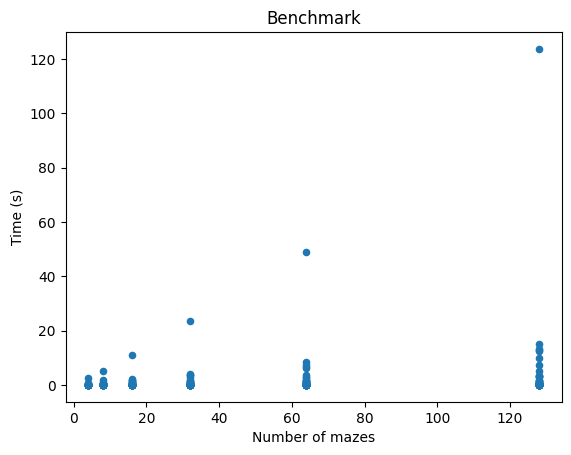

In [7]:
# plot the results
df.plot(
	x = "n_mazes",
	y = "time",
	kind = "scatter",
	# logx = True,
	# logy = True,
	title = "Benchmark",
	xlabel = "Number of mazes",
	ylabel = "Time (s)",
)